In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
match_data=pd.read_csv("data/IPL Matches 2008-2020.csv", 
                       parse_dates=["date"])
ball_data=pd.read_csv("data/IPL Ball-by-Ball 2008-2020.csv")
match_data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [3]:
ball_data.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [4]:
ball_data.is_wicket.unique()

array([0, 1], dtype=int64)

In [5]:
ball_data["is_wicket"]=ball_data.is_wicket.astype(bool)

### Shape

In [6]:
match_data.shape

(816, 17)

In [7]:
ball_data.shape

(193468, 18)

### Columns name

In [8]:
match_data.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [9]:
ball_data.columns

Index(['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
       'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type',
       'batting_team', 'bowling_team'],
      dtype='object')

### dtypes

In [10]:
match_data.dtypes

id                          int64
city                       object
date               datetime64[ns]
player_of_match            object
venue                      object
neutral_venue               int64
team1                      object
team2                      object
toss_winner                object
toss_decision              object
winner                     object
result                     object
result_margin             float64
eliminator                 object
method                     object
umpire1                    object
umpire2                    object
dtype: object

In [11]:
ball_data.dtypes

id                   int64
inning               int64
over                 int64
ball                 int64
batsman             object
non_striker         object
bowler              object
batsman_runs         int64
extra_runs           int64
total_runs           int64
non_boundary         int64
is_wicket             bool
dismissal_kind      object
player_dismissed    object
fielder             object
extras_type         object
batting_team        object
bowling_team        object
dtype: object

### Null value check

In [12]:
match_data.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [13]:
ball_data.isnull().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

In [14]:
ball_data.bowler.nunique()

420

### Shakib Al Hasan bowling performance

In [15]:
shakib_ball=ball_data[ball_data.bowler.isin(["Shakib Al Hasan"])]
shakib_ball.shape

(1358, 18)

In [16]:
shakib_ball.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
44204,501209,1,4,1,R Dravid,AG Paunikar,Shakib Al Hasan,0,0,0,0,False,NaN,NaN,NaN,NaN,Rajasthan Royals,Kolkata Knight Riders
44205,501209,1,4,2,R Dravid,AG Paunikar,Shakib Al Hasan,1,0,1,0,False,NaN,NaN,NaN,NaN,Rajasthan Royals,Kolkata Knight Riders
44206,501209,1,4,3,AG Paunikar,R Dravid,Shakib Al Hasan,0,0,0,0,True,caught,AG Paunikar,JH Kallis,NaN,Rajasthan Royals,Kolkata Knight Riders
44207,501209,1,4,4,AL Menaria,R Dravid,Shakib Al Hasan,0,0,0,0,False,NaN,NaN,NaN,NaN,Rajasthan Royals,Kolkata Knight Riders
44208,501209,1,4,5,AL Menaria,R Dravid,Shakib Al Hasan,1,0,1,0,False,NaN,NaN,NaN,NaN,Rajasthan Royals,Kolkata Knight Riders


In [17]:
shakib_ball.bowling_team.unique()

array(['Kolkata Knight Riders', 'Sunrisers Hyderabad'], dtype=object)

In [18]:
print("Shakib Al Hasan totla played match in IPL :",
      shakib_ball.id.nunique())

Shakib Al Hasan totla played match in IPL : 62


In [19]:
print('Shakib Al Hasan total wicket in IPL :', 
     shakib_ball.is_wicket.sum())

Shakib Al Hasan total wicket in IPL : 66


In [20]:
shakib_team_vs=shakib_ball.groupby(["bowling_team", 
                         "batting_team"]).is_wicket.sum()
shakib_team_vs

bowling_team           batting_team               
Kolkata Knight Riders  Chennai Super Kings             3
                       Delhi Daredevils                3
                       Gujarat Lions                   1
                       Kings XI Punjab                 3
                       Kochi Tuskers Kerala            3
                       Mumbai Indians                 10
                       Pune Warriors                   4
                       Rajasthan Royals                9
                       Rising Pune Supergiants         2
                       Royal Challengers Bangalore     4
                       Sunrisers Hyderabad             6
Sunrisers Hyderabad    Chennai Super Kings             1
                       Delhi Daredevils                2
                       Kings XI Punjab                 2
                       Kolkata Knight Riders           6
                       Mumbai Indians                  2
                       Rajasthan Roya

In [21]:
kkr_vs=shakib_team_vs["Kolkata Knight Riders"].sort_values(ascending=True)

In [22]:
type(kkr_vs)

pandas.core.series.Series

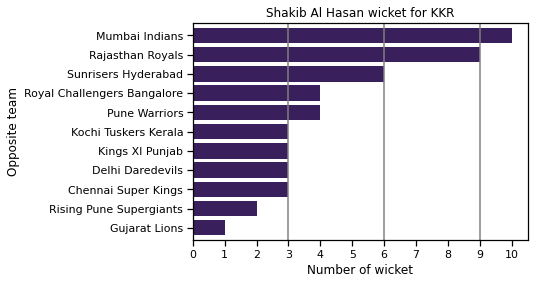

In [23]:
sns.set_context("notebook")
#sns.reset_defaults()
fig, ax=plt.subplots()
kkr_vs.plot(kind="barh", color="#391F5C", width=0.8, ax=ax)
ax.set_xticks(range(11))

ax.set_xlabel("Number of wicket")
ax.set_ylabel("Opposite team")
ax.set_title("Shakib Al Hasan wicket for KKR")

xpoints = [3, 6, 9]
colors = ["grey"]*3
for p, c in zip(xpoints, colors):
    plt.axvline(p, color=c)
plt.show()

In [24]:
shakib_ball.groupby(by=["bowling_team"]).is_wicket.sum()

bowling_team
Kolkata Knight Riders    48
Sunrisers Hyderabad      18
Name: is_wicket, dtype: int64